<a href="https://colab.research.google.com/github/Asvikap/Cardiovascular_Diseases_Risk_Prediction/blob/main/CVD_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/CVD_cleaned.csv')
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [7]:
df.describe().style.background_gradient(cmap='BuGn')

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [8]:
cols = df.columns

In [9]:
for i in cols:
  print(df[i].value_counts())
  print()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

Yes    239381
No      69473
Name: Exercise, dtype: int64

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

No     278860
Yes     29994
Name: Skin_Cancer, dtype: int64

No     278976
Yes     29878
Name: Other_Cancer, dtype: int64

No     246953
Yes     61901
Name: Depression, dtype: int64

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

No     207783
Yes    101071
Name: Arthritis, dtype: int64

Female    160196
Male      148658
Name: Sex, dtype: int64

6

In [10]:
cols_tmp = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Arthritis','Smoking_History']

In [13]:
df[cols_tmp] = df[cols_tmp].replace({
    'Yes':1,
    'No':0
})

df[cols_tmp]

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Smoking_History
0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
308849,1,0,0,0,0,0,0
308850,1,0,0,0,0,0,0
308851,1,0,0,0,1,0,1
308852,1,0,0,0,0,0,0


In [14]:
df['General_Health'].value_counts()

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

In [16]:
df['General_Health'] = df['General_Health'].replace({
    'Very Good':5,
    'Good':4,
    'Excellent':3,
    'Fair':2,
    'Poor':1
})

In [17]:
df['General_Health'].value_counts()

5    110395
4     95364
3     55954
2     35810
1     11331
Name: General_Health, dtype: int64

In [19]:
df['Sex'] = df['Sex'].replace({
    'Male':0,
    'Female':1
})

In [21]:
df['Sex'].value_counts()

1    160196
0    148658
Name: Sex, dtype: int64

In [22]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [23]:
df['Checkup'] = df['Checkup'].replace({
    'Never':0,
    'Within the past year':1,
    'Within the past 2 years':2,
    'Within the past 5 years':3,
    '5 or more years ago':4
})

df['Checkup'].value_counts()

1    239371
2     37213
3     17442
4     13421
0      1407
Name: Checkup, dtype: int64

In [24]:
df['Age_Category'].value_counts()

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64

In [26]:
df['Age_Category'] = df['Age_Category'].replace({
    '80+':'80-100'
})

In [28]:
df['Age_Category'].value_counts()

65-69     33434
60-64     32418
70-74     31103
55-59     28054
50-54     25097
80-100    22271
40-44     21595
45-49     20968
75-79     20705
35-39     20606
18-24     18681
30-34     18428
25-29     15494
Name: Age_Category, dtype: int64

In [33]:

new_columns = df['Age_Category'].str.split('-', expand=True)
new_columns.columns = ['Age_min','Age_max']
new_columns = new_columns.astype(int)
#df = pd.concat([DataFrameXchg, new_columns], axis=1)
df = df.drop(['Age_Category'], axis=1)
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,No,1,1,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,5,1,0,1,0,0,0,Yes,0,1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,5,1,1,0,0,0,0,Yes,0,1,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,1,0,0,0,Yes,0,0,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,4,1,0,0,0,0,0,No,0,0,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,5,1,1,0,0,0,0,No,0,0,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,2,3,1,0,0,0,0,Yes,0,0,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,5,4,1,0,0,0,1,"Yes, but female told only during pregnancy",0,1,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,5,1,1,0,0,0,0,No,0,0,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [34]:
data_no_abnormal_diabetes = df[~df['Diabetes'].isin(['No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy'])]

print('Before')
display(data_no_abnormal_diabetes['Diabetes'].value_counts())

# Encoding
data_no_abnormal_diabetes['Diabetes'] = data_no_abnormal_diabetes['Diabetes'].replace({
    'Yes':1,
    'No':0
})
data_no_abnormal_diabetes['Diabetes'].value_counts()

Before


No     259141
Yes     40171
Name: Diabetes, dtype: int64

<ipython-input-34-413b61690584>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_abnormal_diabetes['Diabetes'] = data_no_abnormal_diabetes['Diabetes'].replace({


0    259141
1     40171
Name: Diabetes, dtype: int64

In [35]:
data_abnormal_diabetes = df.copy()
data_abnormal_diabetes['Diabetes'] = data_abnormal_diabetes['Diabetes'].replace({
    'Yes, but female told only during pregnancy':1,
    'No, pre-diabetes or borderline diabetes':0,
    'Yes':1,
    'No':0
})

data_abnormal_diabetes['Diabetes'].value_counts()

0    266037
1     42817
Name: Diabetes, dtype: int64

In [36]:
data_no_abnormal_diabetes

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0,1,1,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,5,1,0,1,0,0,0,1,0,1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,5,1,1,0,0,0,0,1,0,1,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,1,0,0,0,1,0,0,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,4,1,0,0,0,0,0,0,0,0,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,4,3,1,0,0,0,0,0,0,0,168.0,58.97,20.98,0,0.0,16.0,12.0,0.0
308849,5,1,1,0,0,0,0,0,0,0,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,2,3,1,0,0,0,0,1,0,0,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308852,5,1,1,0,0,0,0,0,0,0,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


In [37]:
data_abnormal_diabetes

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,2,0,0,0,0,0,0,1,1,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,5,1,0,1,0,0,0,1,0,1,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,5,1,1,0,0,0,0,1,0,1,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,1,1,1,0,0,0,1,0,0,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,4,1,0,0,0,0,0,0,0,0,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,5,1,1,0,0,0,0,0,0,0,168.0,81.65,29.05,0,4.0,30.0,8.0,0.0
308850,2,3,1,0,0,0,0,1,0,0,180.0,69.85,21.48,0,8.0,15.0,60.0,4.0
308851,5,4,1,0,0,0,1,1,0,1,157.0,61.23,24.69,1,4.0,40.0,8.0,4.0
308852,5,1,1,0,0,0,0,0,0,0,183.0,79.38,23.73,0,3.0,30.0,12.0,0.0


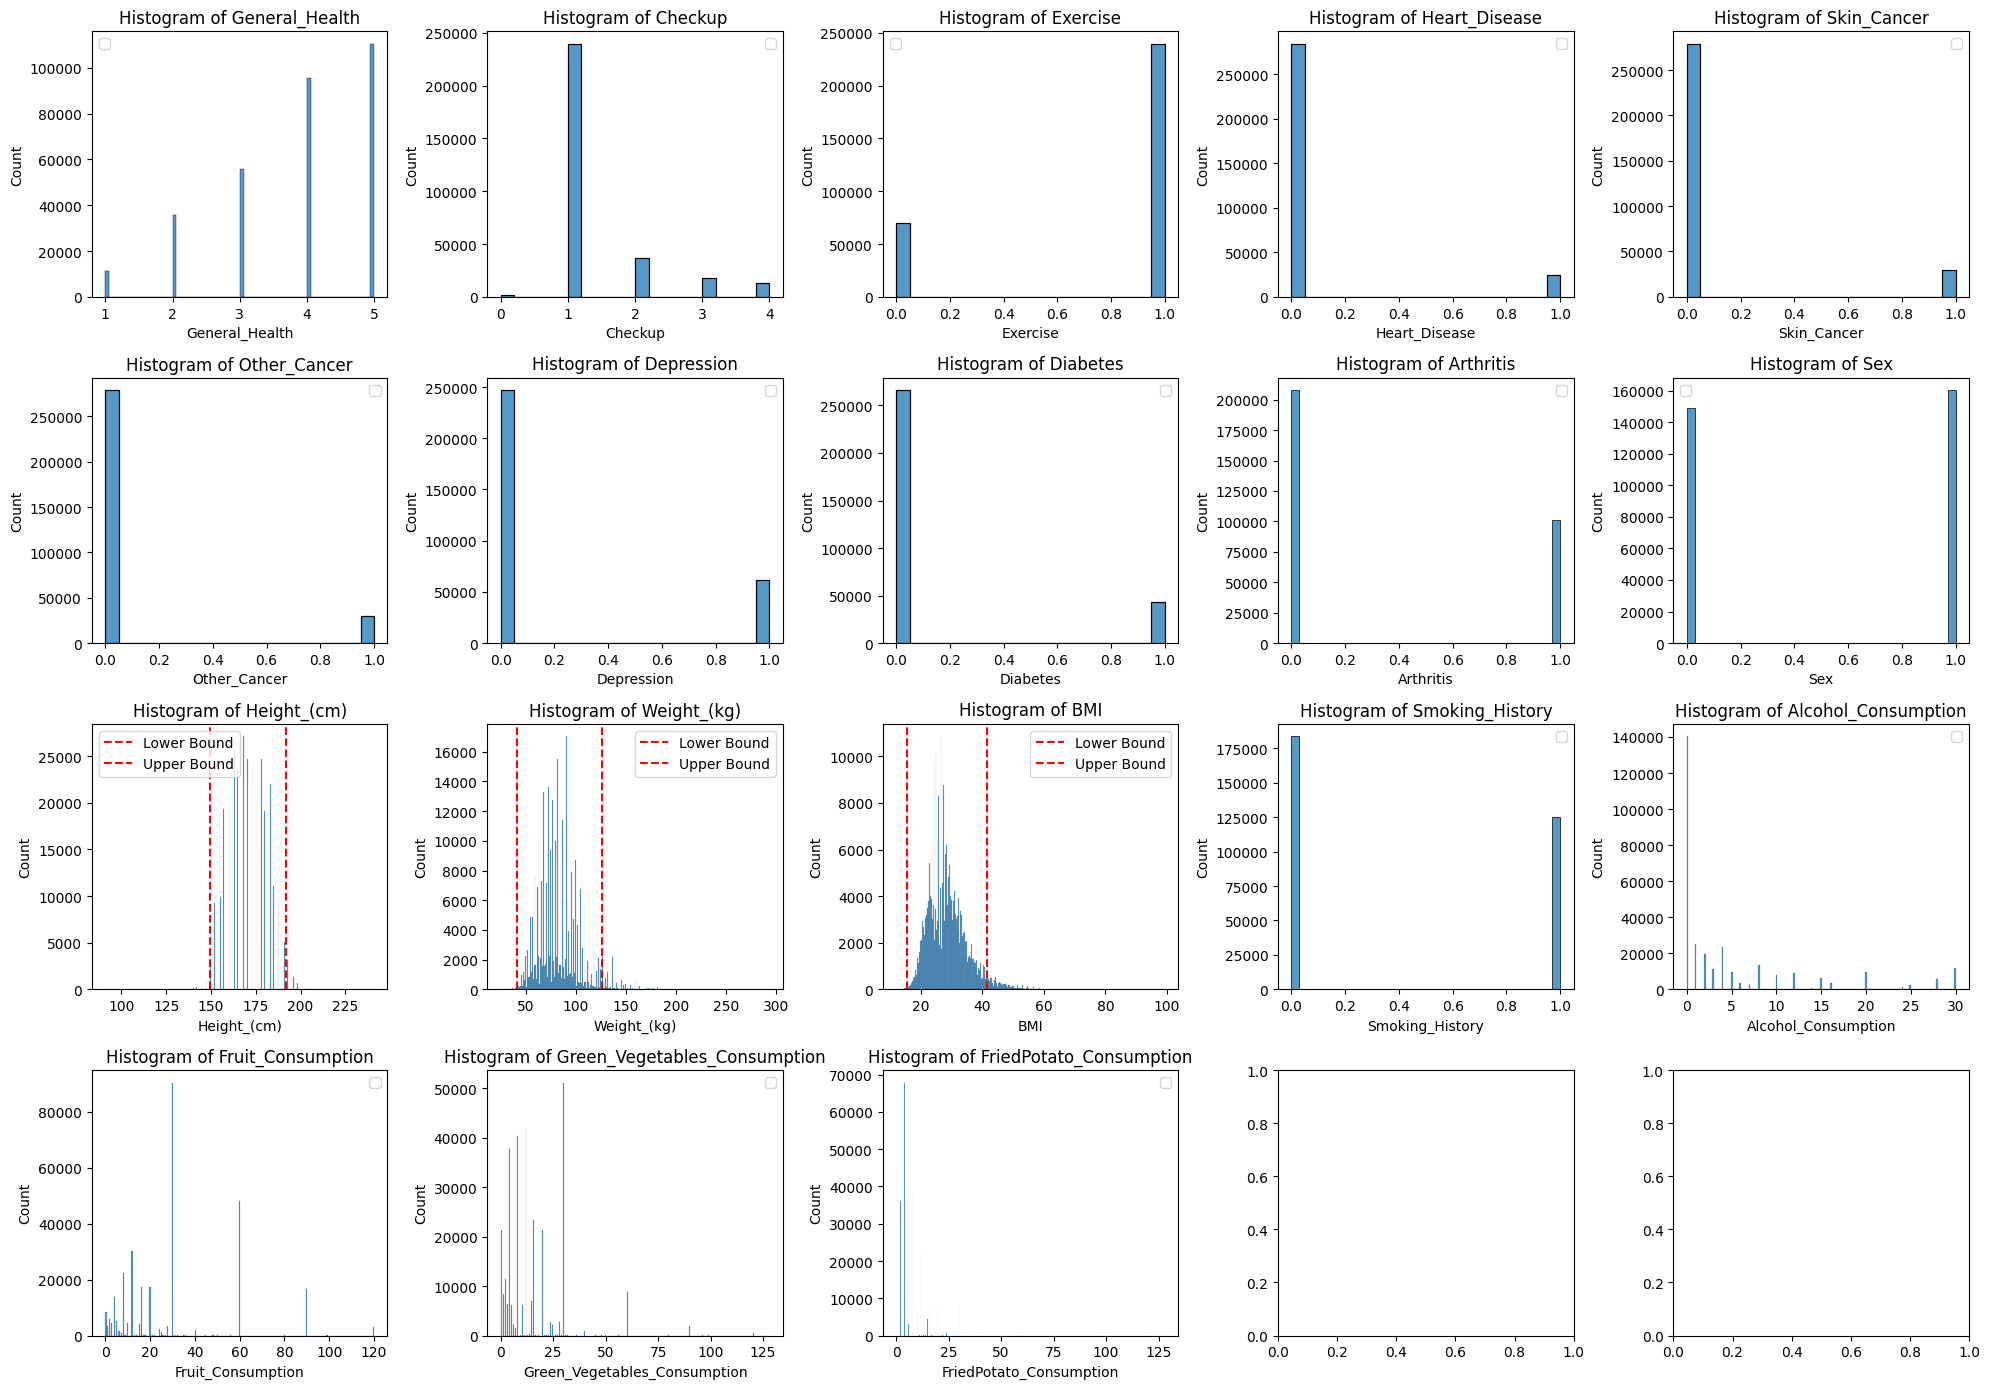

In [38]:
fig, axes = plt.subplots(4, 5, figsize=(20, 14))

for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    if col in ['Height_(cm)', 'Weight_(kg)', 'BMI']:
        mean = data_abnormal_diabetes[col].mean()
        std = data_abnormal_diabetes[col].std()
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std

        # Plot red lines indicating the outlier bounds in the current subplot
        ax.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
        ax.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
      # Plot histogram in the current subplot
    sns.histplot(data=data_abnormal_diabetes, ax=ax, x=col)

    # Set labels and title for the current subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram of {col}')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [39]:
data_train_dia = data_abnormal_diabetes.copy()
data_train_no_dia = data_no_abnormal_diabetes.copy()

lower_percentile = 5
upper_percentile = 95

# Perform quantile capping on data_train_dia
lower_bound_dia = data_train_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_dia = data_train_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_dia, upper_bound_dia, axis=1)

# Perform quantile capping on data_train_no_dia
lower_bound_no_dia = data_train_no_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(lower_percentile/100)
upper_bound_no_dia = data_train_no_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].quantile(upper_percentile/100)
data_train_no_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']] = data_train_no_dia[['Height_(cm)', 'Weight_(kg)', 'BMI']].clip(lower_bound_no_dia, upper_bound_no_dia, axis=1)

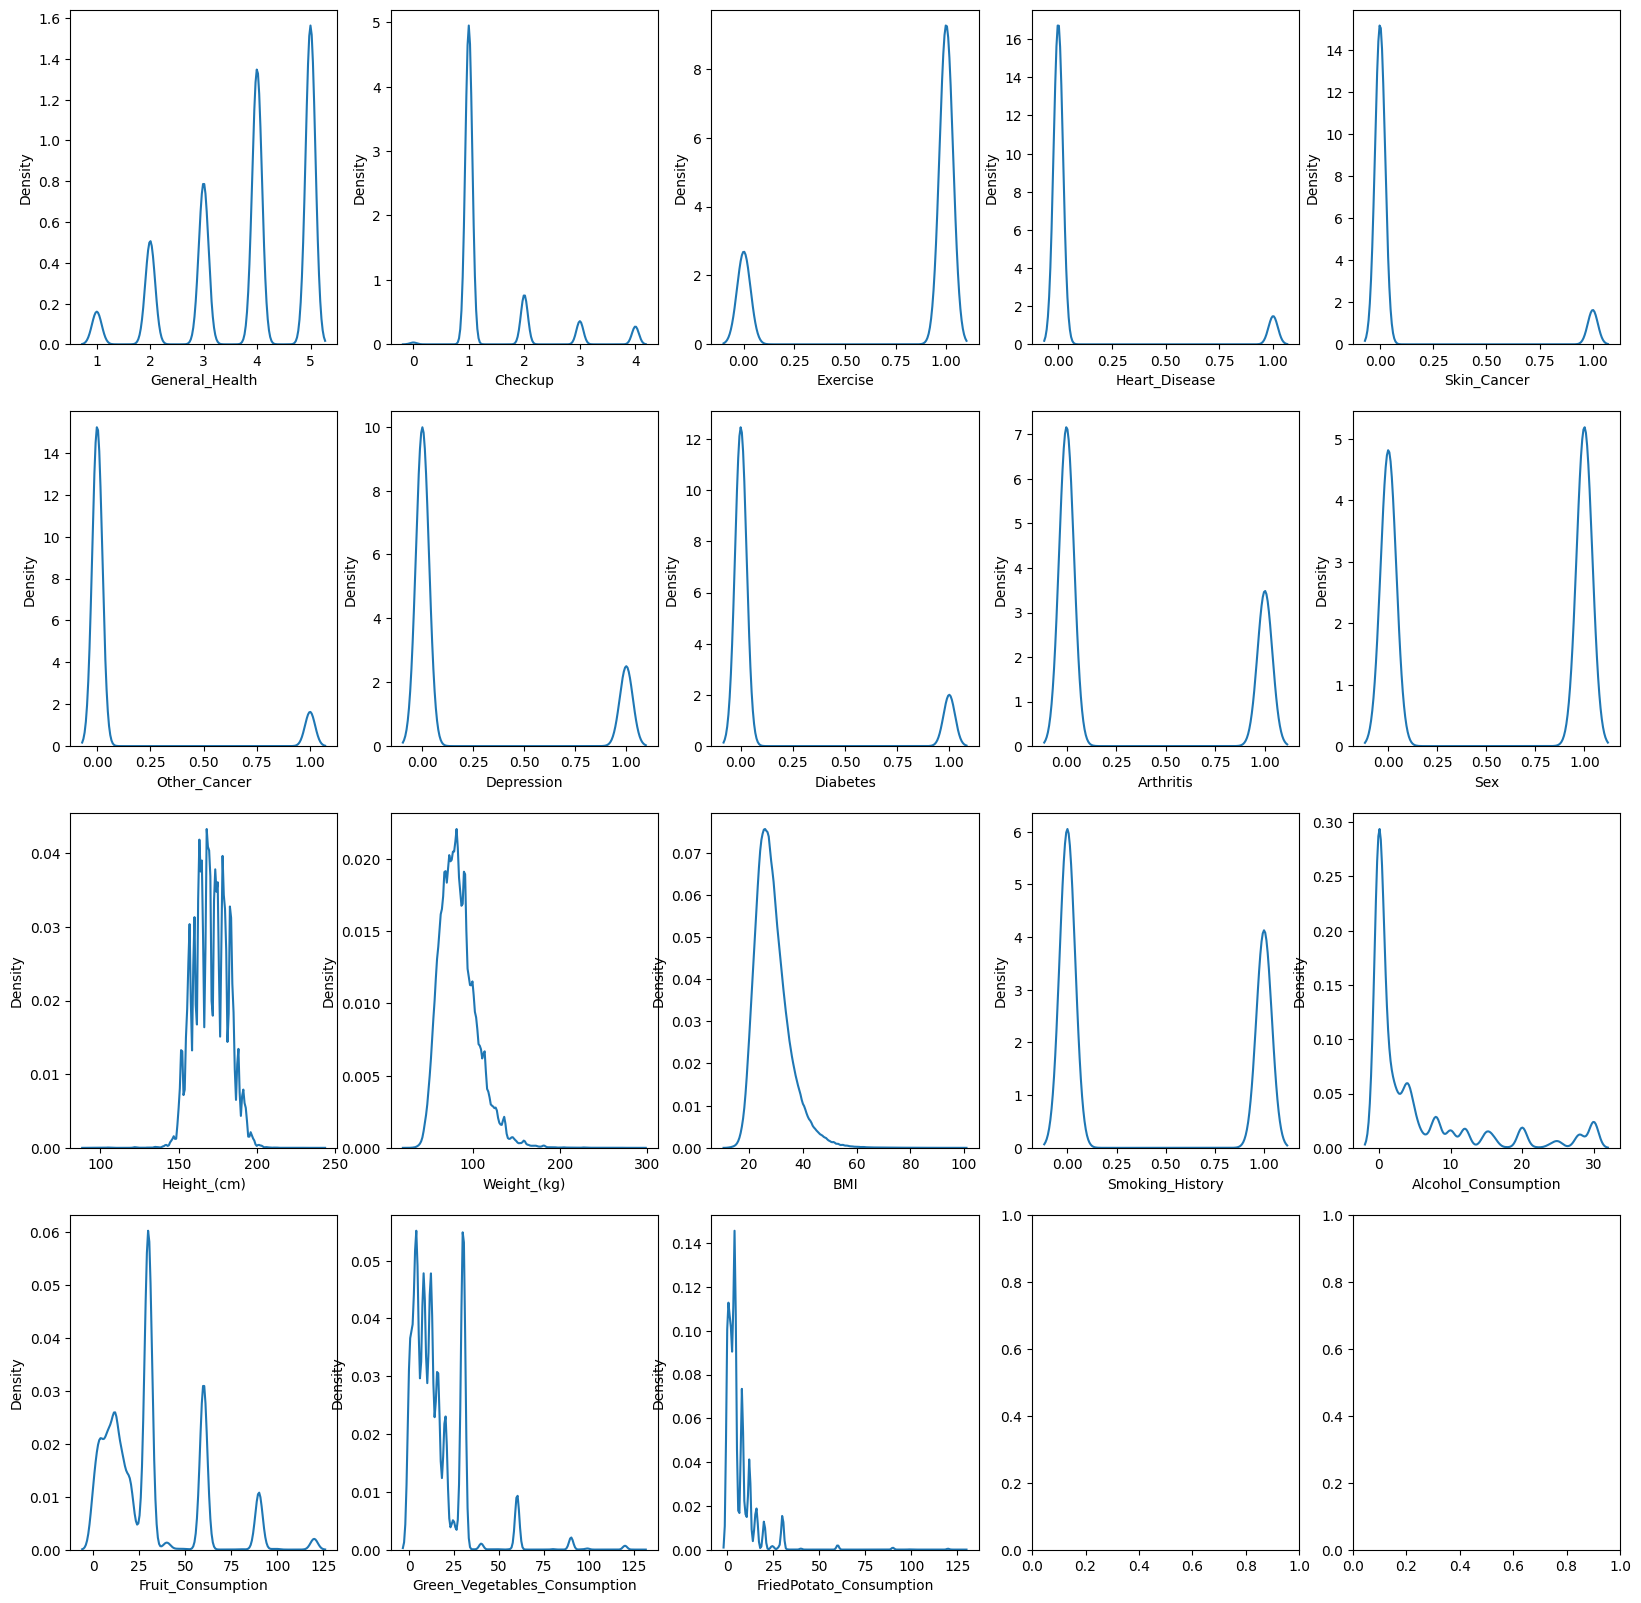

In [40]:
fig, axes = plt.subplots(4, 5, figsize=(20,20))

for col, ax in zip(data_abnormal_diabetes, axes.flatten()):
    sns.kdeplot(data=data_abnormal_diabetes, ax=ax, x=col)

In [41]:
data_corr_no_dia = data_train_no_dia.corr()
data_corr_dia = data_train_dia.corr()

Text(0.5, 1.0, 'With abnormal diabetes')

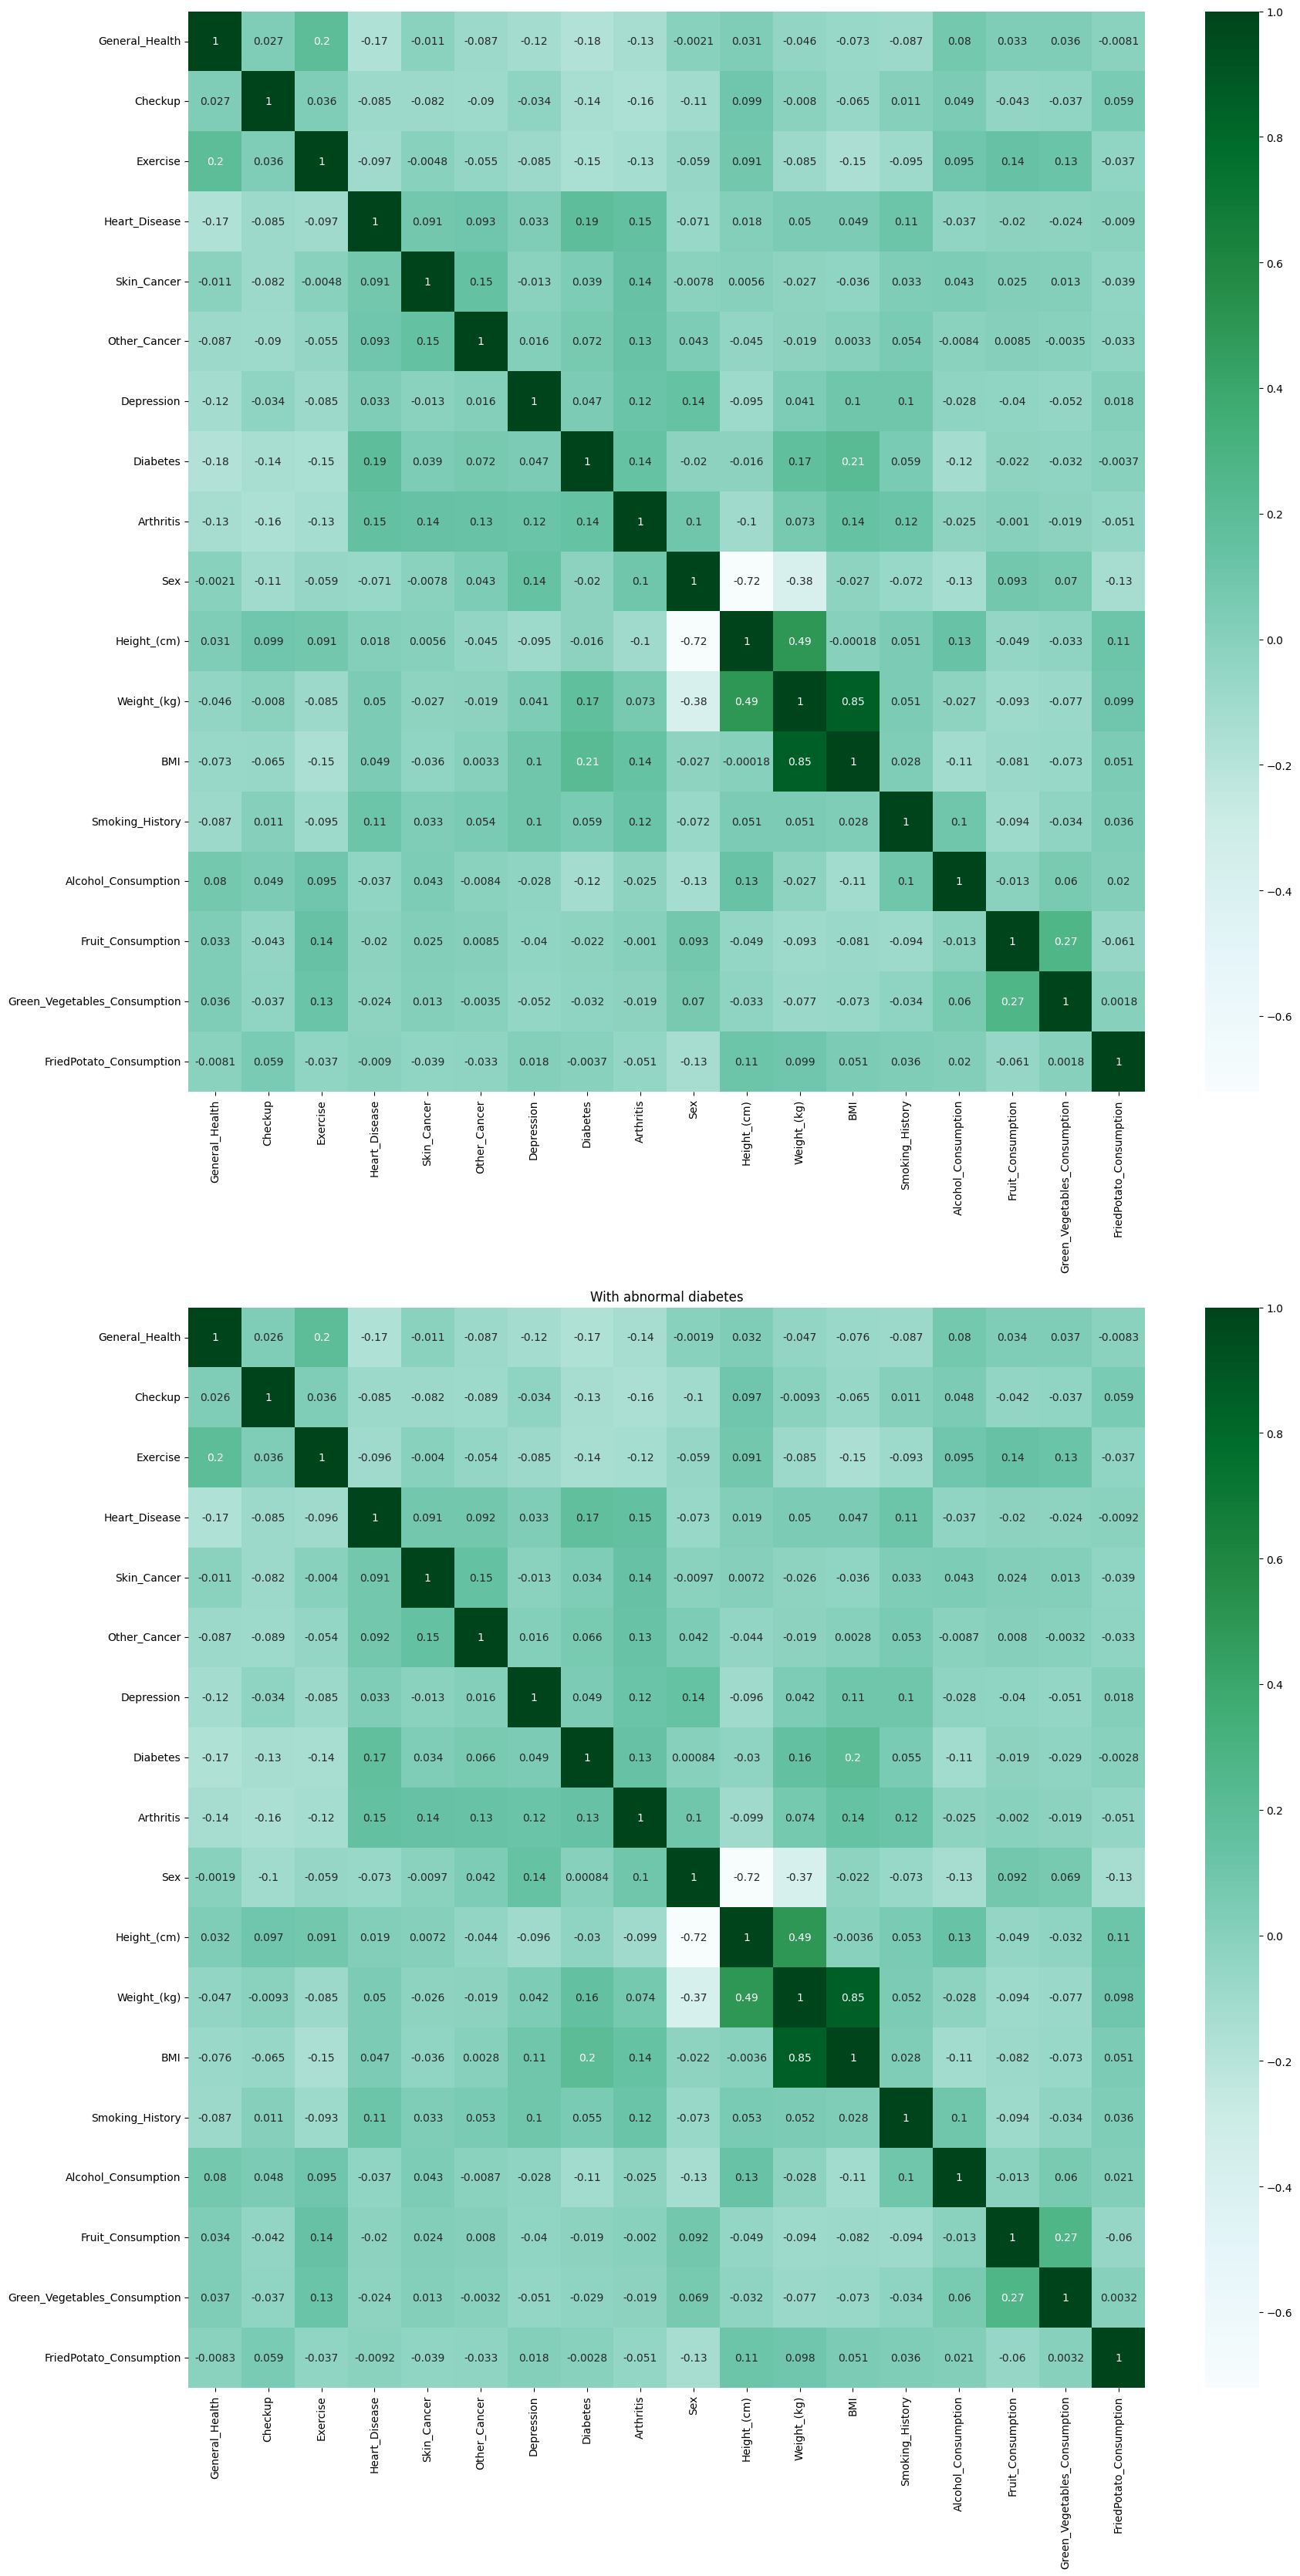

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(20, 40))

sns.heatmap(
    data=data_corr_no_dia,
    cmap='BuGn',
    annot=True,
    ax=axes[0]
)
plt.title('Without abnormal diabetes')

sns.heatmap(
    data=data_corr_dia,
    cmap='BuGn',
    annot=True,
    ax=axes[1]
)
plt.title('With abnormal diabetes')

5    110395
4     95364
3     55954
2     35810
1     11331
Name: General_Health, dtype: int64


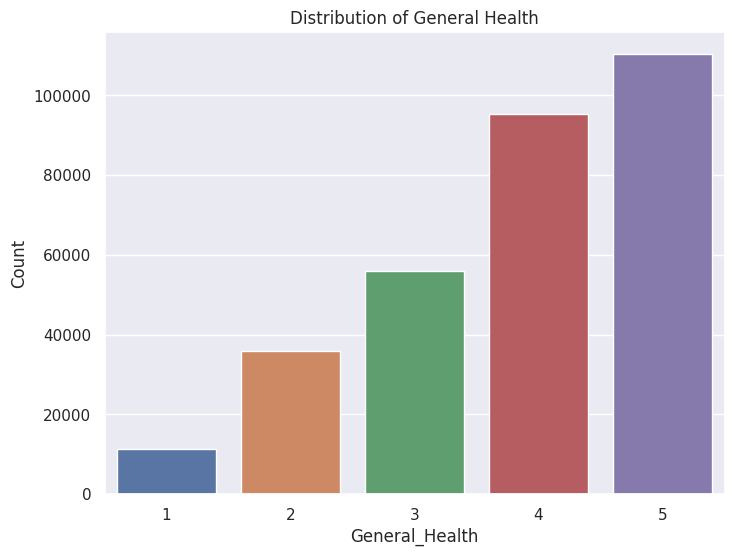

In [43]:
# Frequency table for "General_Health"
general_health_counts = df["General_Health"].value_counts()
print(general_health_counts)

# Bar chart for "General_Health"
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="General_Health")
plt.xlabel("General_Health")
plt.ylabel("Count")
plt.title("Distribution of General Health")
plt.show()

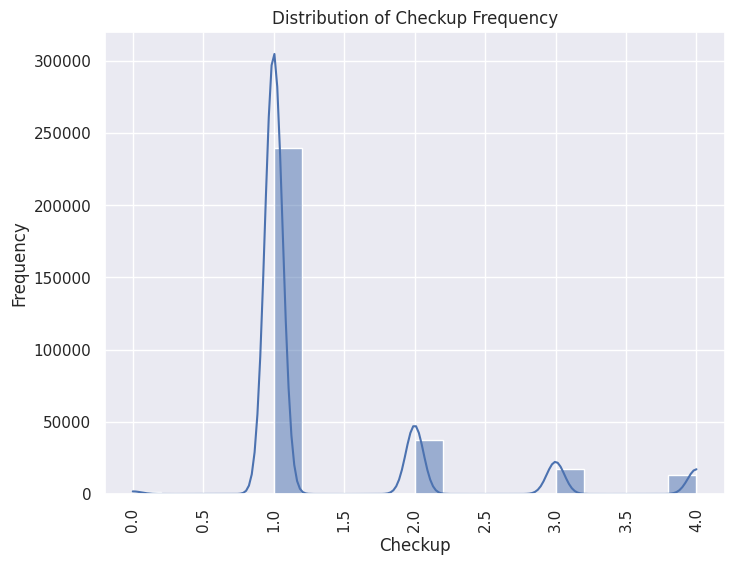

In [44]:
# Histogram for "Checkup"
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Checkup", kde=True)
plt.xlabel("Checkup")
plt.ylabel("Frequency")
plt.title("Distribution of Checkup Frequency")
plt.xticks(rotation=90)
plt.show()


Heart_Disease        0      1
row_0                        
General_Health  283883  24971


<Figure size 1000x600 with 0 Axes>

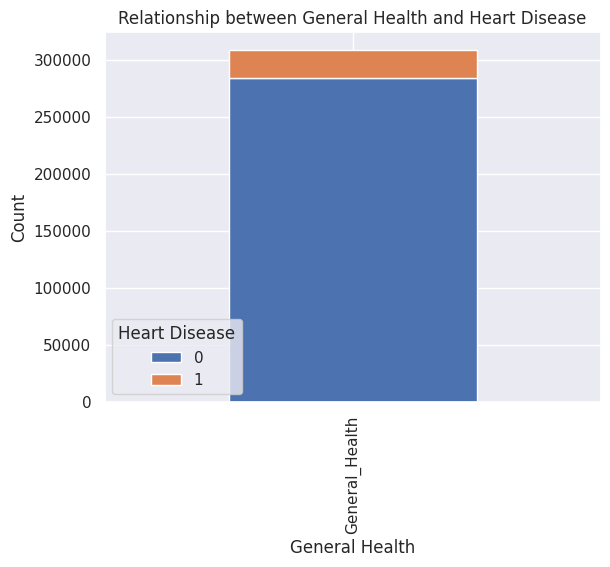

In [45]:
#Cross-tabulation of "General_Health" and "Heart_Disease"
cross_tab = pd.crosstab(["General_Health"], df["Heart_Disease"])
print(cross_tab)

# Stacked bar chart of "General_Health" and "Heart_Disease"
plt.figure(figsize=(10, 6))
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("General Health")
plt.ylabel("Count")
plt.title("Relationship between General Health and Heart Disease")
plt.legend(title="Heart Disease")
plt.show()

In [47]:
from scipy.stats import chi2_contingency
# Create a contingency table of General Health and Heart Disease
contingency_table = pd.crosstab(df["General_Health"], df["Heart_Disease"])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 19234.33413703971
p-value: 0.0
